In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#loading the data
online_shopping_path = "../starter_code/online_shopping.csv"

In [3]:
#importing the .csv
shopping_data = pd.read_csv(online_shopping_path)


In [4]:
#previewing the data
shopping_data

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


In [5]:
# looking at the .info for null values and dtypes
shopping_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [6]:
# getting the column headings to use for analysis
print(shopping_data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [7]:
#dropping the unnamed column
clean_shopping_df = shopping_data.drop('Unnamed: 0', axis=1, inplace=False)
clean_shopping_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [8]:
#dropping the product SKU column
clean_shopping_df = shopping_data.drop('Product_SKU', axis=1, inplace=False)
clean_shopping_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [9]:
#dropping remaining null values
clean_shopping_df = clean_shopping_df.dropna(axis=0, how="any")
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_Description  52524 non-null  object 
 8   Product_Category     52524 non-null  object 
 9   Quantity             52524 non-null  float64
 10  Avg_Price            52524 non-null  float64
 11  Delivery_Charges     52524 non-null  float64
 12  Coupon_Status        52524 non-null  object 
 13  GST                  52524 non-null  float64
 14  Date                 52524 non-null  object 
 15  Offline_Spend        52524 non-null  floa

In [10]:
#looking at product counts
clean_shopping_df.Product_Category.value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64

In [11]:
#coupon status counts
clean_shopping_df.Coupon_Status.value_counts()

Coupon_Status
Clicked     26720
Used        17778
Not Used     8026
Name: count, dtype: int64

In [12]:
clean_shopping_df.Coupon_Code.value_counts()

Coupon_Code
SALE20     6373
SALE30     5915
SALE10     5838
ELEC10     4826
ELEC30     4647
ELEC20     4540
EXTRA10    2317
OFF10      2250
EXTRA20    2211
OFF20      2202
OFF30      2061
EXTRA30    2047
NE30       1003
NE20        740
AIO10       654
AIO20       618
AIO30       610
NE10        455
NJ20        299
NJ10        280
HGEAR10     267
HGEAR20     267
HGEAR30     237
WEMP20      205
WEMP30      185
NJ30        170
WEMP10      164
NCA10       116
NCA30       110
BT10         98
ACC20        97
NCA20        91
GC10         89
BT30         87
BT20         83
ACC30        77
ACC10        60
HOU20        50
HOU10        42
GC20         41
HOU30        30
GC30         29
AND30        16
AND10        14
AND20        13
Name: count, dtype: int64

In [13]:
#gender value counts
clean_shopping_df.Gender.value_counts()

Gender
F    32767
M    19757
Name: count, dtype: int64

In [14]:
#location value counts
clean_shopping_df.Location.value_counts()

Location
Chicago          18240
California       16008
New York         11097
New Jersey        4470
Washington DC     2709
Name: count, dtype: int64

In [15]:
# convert date to month, day, year
clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])
clean_shopping_df["Transaction_Date"] = clean_shopping_df["Transaction_Date"].dt.strftime("%m-%d-%Y")
clean_shopping_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,01-01-2019,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,01-01-2019,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [16]:
clean_shopping_df.tail()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52919,52919,13155.0,F,California,8.0,22504.0,03-10-2019,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,52920,18077.0,M,Chicago,34.0,24250.0,03-28-2019,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,52921,16085.0,M,California,15.0,39991.0,10-06-2019,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,52922,16085.0,M,California,15.0,39991.0,10-06-2019,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52923,52923,13659.0,F,Chicago,8.0,39998.0,10-06-2019,Google Spiral Journal with Pen,Notebooks & Journals,1.0,5.59,6.5,Not Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


In [17]:
#combining new york and new jersy into one group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New York": "New Jersey"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Chicago          18240
California       16008
New Jersey       15567
Washington DC     2709
Name: count, dtype: int64>

In [18]:
#combining washington DC and the new jersey group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New Jersey": "Washington DC"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Washington DC    18276
Chicago          18240
California       16008
Name: count, dtype: int64>

In [19]:
#renaming the group to northeast
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"Washington DC": "North East"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
North East    18276
Chicago       18240
California    16008
Name: count, dtype: int64>

In [20]:
#combining nest canada and nest usa
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-Canada": "Nest-USA"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest-USA                14330
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [21]:
#grouping all the nest categories together
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-USA": "Nest"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest                    16528
Office                   6513
Drinkware                3483
Lifestyle                3092
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [22]:
#How do different discount percentages affect the number of repeat customers compared to other discount levels?
discount_CustomerID=clean_shopping_df.groupby("Discount_pct")["CustomerID"].count()
discount_CustomerID 

Discount_pct
10.0    17470
20.0    17830
30.0    17224
Name: CustomerID, dtype: int64

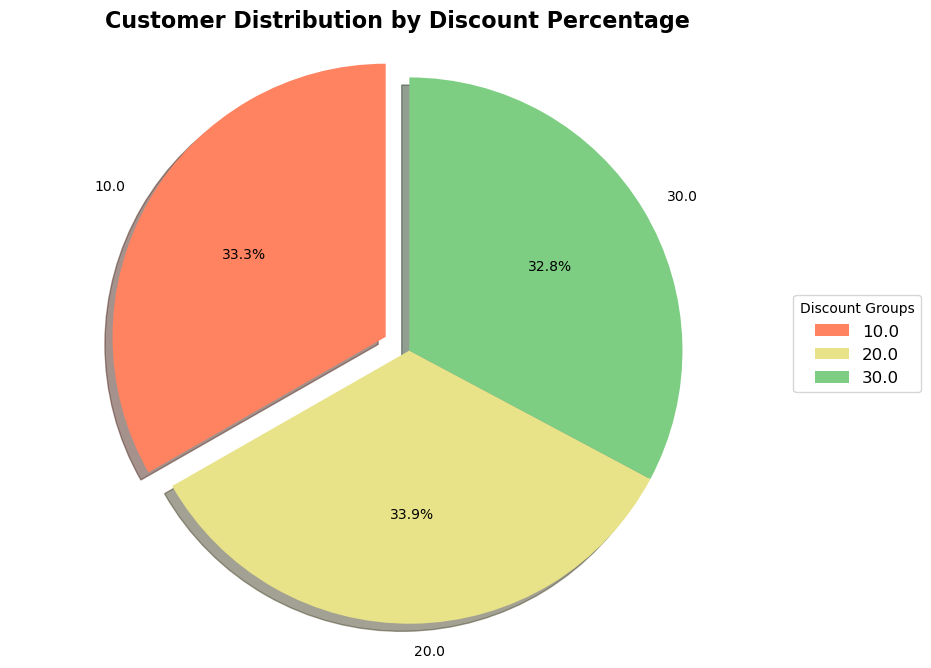

In [23]:
import matplotlib.pyplot as plt

# Calculate total customers from the given Series
total_customers = discount_CustomerID.sum()

# Calculate the percentage for each discount group
discount_percentages = (discount_CustomerID / total_customers) * 100

# Define a custom color palette
color_palette = ['#FF8360', '#E8E288', '#7DCE82', '#3CDBD3', '#00FFF5']

# Emphasize the first slice by exploding it
explode_values = [0.1] + [0] * (len(discount_percentages) - 1)

# Initialize the figure with a specified size
plt.figure(figsize=(10, 8))

# Create the pie chart with specified parameters
wedges, texts, autotexts = plt.pie(discount_percentages, labels=discount_percentages.index, autopct='%1.1f%%',
                                   startangle=90, colors=color_palette[:len(discount_percentages)],
                                   explode=explode_values, shadow=True)

# Set the title of the pie chart
plt.title("Customer Distribution by Discount Percentage", fontsize=16, weight='bold')

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Add a legend with appropriate placement
plt.legend(wedges, discount_percentages.index, title="Discount Groups", loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Display the pie chart
plt.show()